In [1]:
# Run this cell so that the necessary packages are imported. 

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
np.random.seed(0) # fix the seed of the random number generator to simplify testing.

For the questions in which you are asked to state the hypothesis or provide some description, please use the space provided in those cells to write your answers as comments, that is, by starting each line with a '#'. 

# Hypothesis Testing

For this homework, use the stats module in the python scipy library.

## Q1: One sample two-sided t-test

Read in data from the file "brain_size_features_demo.csv". The file contains a header row.

Consider the following hypothesis about the attribute "VIQ":
H0: mean(VIQ)  = 107
H1: mean(VIQ) != 107

Write a method that performs a TWO-sided t-test to test the above hypothesis, using the specified alpha as the significance threshold. Return the p-value and the resulting decision (i.e., accept/reject).

In [3]:
# one_sample_two_sided_t_test(filename) takes as input a csv file to read the data from, 
# and returns a tuple with:
# (1) the first element as the p value returned from the t-test, and 
# (2) the second element as a string which returns one of two values: "accept" or "reject", 
# indicating whether the hypothesis, using the specified alpha, is accepted or rejected.


attributeName = 'VIQ'

def one_sample_two_sided_t_test(filename, alpha):
    l=[]
    df=pd.read_csv(filename)
    p=st.ttest_1samp(df[attributeName], 107, nan_policy='omit')
    l.append(p[1])
    if p[1]>alpha:
        r='accept'
    else:
        r='reject'
    l.append(r)
    return(tuple(l))
    
    
    ###
    ### YOUR CODE HERE
    ###
    
# For example,
one_sample_two_sided_t_test('brain_size_features_demo.csv', 0.10) # -> (0.1761817022684744, 'accept')


(0.1761817022684744, 'accept')

In [4]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q2: One sample one-sided t-test

Read in data from the file "brain_size_features_demo.csv". The file contains a header row.

Consider the following hypothesis about the attribute "VIQ":
H0: mean(VIQ) <= 107
H1: mean(VIQ) > 107

Write a method that performs a ONE-sided t-test to test the above hypothesis, using the specified alpha as the significance threshold. Return the p-value and the resulting decision (i.e., accept/reject).

In [6]:
# one_sample_one_sided_t_test(filename) takes as input a csv file to read the data from, 
# and returns a tuple with:
# (1) the first element as the p value returned from the t-test, and 
# (2) the second element as a string which returns one of two values: "accept" or "reject", 
# indicating whether the hypothesis, using the specified alpha, is accepted or rejected.


attributeName = 'VIQ'

def one_sample_one_sided_t_test(filename, alpha):
    l=[]
    df=pd.read_csv(filename)
    p=st.ttest_1samp(df[attributeName], 107, nan_policy='omit')
    l.append(p[1]/2)
    if (p[1]/2)>alpha:
        r='accept'
    else:
        r='reject'
    l.append(r)
    return(tuple(l))

    ###
    ### YOUR CODE HERE
    ###
    
# For example,
one_sample_one_sided_t_test('brain_size_features_demo.csv', 0.10) # -> (0.0880908511342372, 'reject')


(0.0880908511342372, 'reject')

In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q3: Two sample unpaired t-test

Read in data from the file "brain_size_features_demo.csv". The file contains a header row.

Consider the following hypothesis about the attribute "VIQ":
H0: mean(Female.VIQ)  = mean(Male.VIQ)
H1: mean(Female.VIQ) != mean(Male.VIQ)

Write a method that performs a TWO-sample UNPAIRED t-test to test the above hypothesis (that VIQ varies with the value of 'Gender'), using the specified alpha as the significance threshold. Return the p-value and the resulting decision (i.e., accept/reject).

In [9]:
# two_sample_unpaired_t_test(filename) takes as input a csv file to read the data from, 
# and returns a tuple with:
# (1) the first element as the p value returned from the t-test, and 
# (2) the second element as a string which returns one of two values: "accept" or "reject", 
# indicating whether the hypothesis, using the specified alpha, is accepted or rejected.

attributeName = 'VIQ'

def two_sample_unpaired_t_test(filename, alpha):
    l=[]
    df=pd.read_csv(filename)
    d1=df[df.Gender=='Female']
    d2=df[df.Gender=='Male']
    p=st.ttest_ind(d1.VIQ, d2.VIQ, nan_policy='omit')
    l.append(p[1])
    if (p[1])>alpha:
        r='accept'
    else:
        r='reject'
    l.append(r)
    return(tuple(l))
    

    ###
    ### YOUR CODE HERE
    ###
    
# For example,
two_sample_unpaired_t_test('brain_size_features_demo.csv', 0.10) # -> (0.4550660394858371, 'accept')


(0.4550660394858371, 'accept')

In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [11]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q4: Two sample paired t-test

Read in data from the file "brain_size_features_demo.csv". The file contains a header row.

Consider the following hypothesis about the attributes "FSIQ" and "PIQ":
H0: mean(FSIQ)  = mean(PIQ)
H1: mean(FSIQ) != mean(PIQ)

Write a method that performs a TWO-sample PAIRED t-test to test the above hypothesis, using the specified alpha as the significance threshold. The method should also calculate the results of an UNPAIRED t-test for comparison. Return the p-value and the resulting decision (i.e., accept/reject) of both tests.

In [12]:
# two_sample_paired_t_test(filename) takes as input a csv file to read the data from, 
# and returns a tuple with:
# (1) the first element as the p value returned from the PAIRED t-test, and 
# (2) the second element as a string which returns one of two values: "accept" or "reject", 
# indicating whether the hypothesis, using the specified alpha, is accepted or rejected.
# (3) the third element as the p value returned from the UNPAIRED t-test, and 
# (4) the fourth element as a string which returns one of two values: "accept" or "reject", 
# indicating whether the hypothesis, using the specified alpha, is accepted or rejected.

attribute1 = 'FSIQ'
attribute2 = 'PIQ'

def two_sample_paired_t_test(filename, alpha):
    
    l=[]
    df=pd.read_csv(filename)
    d1=df['FSIQ']
    d2=df['PIQ']
    p=st.ttest_rel(d1, d2, nan_policy='omit') #paired
    l.append(p[1])
    if (p[1])>alpha:
        r='accept'
    else:
        r='reject'
    l.append(r)
    p1=st.ttest_ind(d1, d2, nan_policy='omit') #unpaired
    l.append(p1[1])
    if (p1[1])>alpha:
        r1='accept'
    else:
        r1='reject'
    l.append(r1)
    return(tuple(l))

    ###
    ### YOUR CODE HERE
    ###
    
# For example,
two_sample_paired_t_test('brain_size_features_demo.csv', 0.10)
# -> (0.11694971066066272, 'accept', 0.6792987985615055, 'accept')

(0.11694971066066272, 'accept', 0.6792987985615055, 'accept')

In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Q5: Data visualization (1pt)

Read data in from the file "iris.csv". The file has a header row. The first four columns are continous features for sepal/petal length/width. The fifth column is the class label indicating the type of iris.

Plot a boxplot to show the distribution of the second variable (sepal width) for each value of the fifth variable (class). 

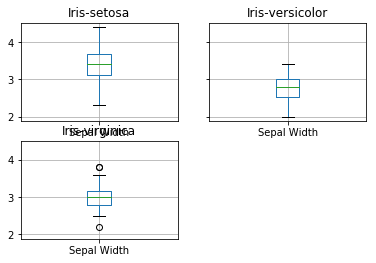

In [15]:
df=pd.read_csv('iris.csv')
#df.head()
df.groupby("Class").boxplot(column='Sepal Width')
plt.show()

In [16]:
df=pd.read_csv('iris.csv')
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Q6: Formulate hypotheses (1pt)

Based on inspecting the box plot visually, formulate two hypotheses about how sepal width differs across the class values. State one hypothesis for class 1 vs 3 (Iris-setsosa vs. Iris-virginica) and one hypothesis for class 2 vs 3 (Iris-versicolor vs. Iris-virginica).

In [17]:
# State H0 and H1 for mean(Iris-setosa) vs. mean (Iris-virginica)

###
H0: mean(Iris-setosa) = mean(Iris-virginica) 
H1: mean(Iris-setosa) != mean(Iris-virginica)
###


SyntaxError: invalid syntax (<ipython-input-17-bd74b8f8c391>, line 4)

In [ ]:
# State H0 and H1 for mean(Iris-versicolor) vs. mean (Iris-virginica)

###
H0: mean(Iris-versicolor) = mean(Iris-virginica) 
H1: mean(Iris-setosa) != mean(Iris-virginica)
###


## Q7: Test hypotheses (2pts)

(a) Perform a t-test to test your hypothesis above for class 1 vs 3 (Iris-setsosa vs. Iris-virginica) with alpha=0.05. Output (Print) the p-value and the resulting decision (i.e., accept/reject) of the test as a tuple, similar to the questions earlier.

In [ ]:
l=[]
df=pd.read_csv('iris.csv')
d1 = df[df.Class=='Iris-setosa']
d1 = d1['Sepal Width']
d2 = df[df.Class=='Iris-virginica']
d2 = d2['Sepal Width']
#print(d1)
p=st.ttest_ind(d1, d2, nan_policy='omit')
l.append(p[1])

if (p[1])>0.05:
    r='accept'
else:
    r='reject'
l.append(r)

print(tuple(l))

(b) Perform a t-test to test your hypothesis above for class 2 vs 3 (Iris-versicolor vs. Iris-virginica) with alpha=0.05. Output (Print) the p-value and the resulting decision (i.e., accept/reject) of the test as a tuple, similar to the questions earlier.

In [ ]:
l=[]
df=pd.read_csv('iris.csv')
d1 = df[df.Class=='Iris-versicolor']
d1 = d1['Sepal Width']
d2 = df[df.Class=='Iris-virginica']
d2 = d2['Sepal Width']
#print(d1)
p=st.ttest_ind(d1, d2, nan_policy='omit')
l.append(p[1])

if (p[1])>0.05:
    r='accept'
else:
    r='reject'
l.append(r)

print(tuple(l))


## Q8: Impact of sample size (2pts)

(a) Construct a stratified sample of the iris data, where you randomly sample 10 examples from each class (30 examples total). Repeat Q5 (box plot).

In [ ]:
#stratified data
df=pd.read_csv('iris.csv')
d1 = df[df.Class=='Iris-setosa']
d2 = df[df.Class=='Iris-versicolor']
d3 = df[df.Class=='Iris-virginica']

#random sample 10 from each data 
numSamples = 10
d1S = d1.sample(numSamples)
d2S = d2.sample(numSamples)
d3S = d3.sample(numSamples)

#append the samples
df_S=d1S.append(d2S)
df_S=df_S.append(d3S)

#plot boxplot for the sample
df.groupby("Class").boxplot(column='Sepal Width')
plt.show()

(b) Repeat Q7a on the sampled data.   

In [ ]:
#stratified data
df=pd.read_csv('iris.csv')
d1 = df[df.Class=='Iris-setosa']
d2 = df[df.Class=='Iris-versicolor']
d3 = df[df.Class=='Iris-virginica']

#random sample 10 from each data 
numSamples = 10
d1S = d1.sample(numSamples)
d2S = d2.sample(numSamples)
d3S = d3.sample(numSamples)

#append the samples
df_S=d1S.append(d2S)
df_S=df_S.append(d3S)


l=[]
d1 = df_S[df_S.Class=='Iris-setosa']
d1 = d1['Sepal Width']
d2 = df_S[df_S.Class=='Iris-versicolor']
d2 = d2['Sepal Width']
p=st.ttest_ind(d1, d2, nan_policy='omit')
l.append(p[1])

if (p[1])>0.05:
    r='accept'
else:
    r='reject'
l.append(r)

print(tuple(l))


(c) Repeat Q7b on the sampled data.   

In [ ]:
#stratified data
df=pd.read_csv('iris.csv')
d1 = df[df.Class=='Iris-setosa']
d2 = df[df.Class=='Iris-versicolor']
d3 = df[df.Class=='Iris-virginica']

#random sample 10 from each data 
numSamples = 10
d1S = d1.sample(numSamples)
d2S = d2.sample(numSamples)
d3S = d3.sample(numSamples)

#append the samples
df_S=d1S.append(d2S)
df_S=df_S.append(d3S)


l=[]
d1 = df_S[df_S.Class=='Iris-versicolor']
d1 = d1['Sepal Width']
d2 = df_S[df_S.Class=='Iris-virginica']
d2 = d2['Sepal Width']
p=st.ttest_ind(d1, d2, nan_policy='omit')
l.append(p[1])

if (p[1])>0.05:
    r='accept'
else:
    r='reject'
l.append(r)

print(tuple(l))

## Q9: Chi-Square test of independence

Consider the data in the file 'titanic.csv', that contains information about Titanic passengers such as Pclass, Name, Sex, Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare. There is also an attribute 'Survived' that records whether the person survived or not.

Consider the following hypothesis about an arbitrary passenger attribute X:
H0: There is NO association between feature X and 'Survived'
H1: There is an association between feature X and 'Survived'

Write a method that performs a chi-square test to test the above hypothesis, using the specified column as attribute X, and the specified alpha as the significance threshold. Return the p-value and the resulting decision (i.e., accept/reject).

In [34]:
# chi_square_test_ind(filename) takes as input a csv file to read the data from, 
# and the column X as col_X to test its association with the feature 'Survived', 
# and returns a tuple with:
# (1) the first element as the p value returned from the chi-square, and 
# (2) the second element as a string which returns one of two values: "accept" or "reject", 
# indicating whether the hypothesis, using the specified alpha, is accepted or rejected.

def chi_square_test_ind(filename, col_X, alpha):
    l=[]
    pd.read_csv(filename)
    col_X_Thresh=df[col_X].median()
    survThresh = df.Survived.median()
    contTab = pd.crosstab(df[col_X] > col_X_Thresh, df.Survived > survThresh)
    p=st.chi2_contingency(contTab)
    l.append(p[1])
    if p[1]>alpha:
        r='accept'
    else:
        r='reject'
    l.append(r)
    print(tuple(l))
    
    
# For example,
chi_square_test_ind('titanic_demo.csv', 'Age', 0.05) # -> (0.16338612253228635, 'accept')

(0.9276737171008429, 'accept')


In [3]:
df=pd.read_csv('titanic_demo.csv')
df.head()

# compute contingency table
ageThresh = df.Age.median()
survThresh = df.Survived.median()
contTab = pd.crosstab(df.Survived > survThresh, df.Age > ageThresh)
contTab

# calculate chi-square test
l=[]
p=st.chi2_contingency(contTab)
#l.append(p[1])
print(p)

(0.008239565543570136, 0.9276737171008429, 1, array([[238.88772846, 229.11227154],
       [152.11227154, 145.88772846]]))


In [35]:
0.008239565543570136*2

0.01647913108714027

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
